##Internship on Data Science and Analytics
Project Overview
During this 4-week internship, the intern will analyze and model a dataset related to
employee salary and job attributes, including factors like job title, job category, experience
level, and work setting. The primary goal is to derive insights from this data and build a
machine learning model to predict salary ranges. By the end of the internship, the intern will
have deployed a Flask-based web application that enables users to input data and receive a
salary prediction based on their parameters.
Dataset Description
The dataset( click here ) includes columns such as:
- work_year: Year of the data record
- job_title: Title of the job position
- job_category: Category of the job position
- salary_currency: Currency of the salary
- salary: Salary in the local currency
- salary_in_usd: Salary in USD
- employee_residence: Location of the employee’s residence
- experience_level: Experience level of the employee (e.g., MI, SE, CT)
- employment_type: Type of employment (e.g., full-time, contract)
- work_setting: The work setting (e.g., remote, in-office)
- company_location: Location of the company
- company_size: Size of the company (e.g., S, M, L)
Goals and Weekly Plan
Week 1: Data Understanding, Cleaning, and EDA
Goal: Familiarize with the dataset, clean and preprocess the data, and perform exploratory
data analysis (EDA) to understand patterns and relationships.
1. Data Loading and Inspection:
- Load the dataset, examine columns, data types, and identify any missing or inconsistent
values.
- Convert data types where necessary (e.g., dates, categorical encoding).
2. Data Cleaning:
- Handle missing values through imputation or removal.
- Standardize categorical values.
- Ensure all salary values are in USD for consistency in analysis.
3. Exploratory Data Analysis (EDA):
- Generate descriptive statistics.
- Plot distribution of salaries by job_category, experience_level, work_setting, and
company_size.
3
ICTAK Solutions Internship
4. Documentation:
- Summarize insights and challenges from the data cleaning and EDA phases.
Week 2: Feature Engineering and Model Selection
Goal: Create new features to improve predictive power, select relevant features, and explore
initial model types for predicting salaries.
1. Feature Engineering:
- Create additional features to improve model accuracy.
2. Feature Selection:
- Use correlation analysis, feature importance, and variance analysis to identify key
features.
3. Model Selection and Testing:
- Start with a few basic regression models.
4. Initial Evaluation:
- Document findings for chosen models.
Week 3: Model Optimization and Flask App Development
Goal: Improve model accuracy through hyperparameter tuning and begin building a Flask
web application.
1. Model Tuning:
- Perform hyperparameter tuning on selected models.
2. Flask Application Development - Backend:
- Set up a Flask app structure and integrate the final model.
3. Testing:
- Test the Flask app locally.
4. Documentation:
- Document the model selection, tuning process, and initial Flask app architecture.
4
ICTAK Solutions Internship
Week 4: Finalizing Flask App, UI Development, and Deployment
Goal: Complete the web application with a user-friendly interface, deploy it, and create final
documentation.
1. Flask Application Development - Frontend:
- Design a web interface for user input.
2. Integration and Testing:
- Connect frontend to Flask backend and perform end-to-end testing.
3.Deployment:
- Deploy the application using a platform like Pythonanywhere.
4. Final Documentation and Presentation:
- Compile a final report and prepare a demo.
Expected Outcomes
By the end of the internship, the intern will have:
- Developed a complete pipeline for analyzing, processing, and predicting salary data.
- Created a deployed Flask application that predicts salaries based on user inputs.
- Documented each phase and delivered a presentation demonstrating the project workflow
and final application.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load data

In [175]:
jobs = pd.read_excel('/content/dsa_job.xlsx') #Read the dataset
jobs.head()   # used to display the first few rows of the DataFrame


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


##Data Exploration

In [176]:
jobs.describe().astype(int)  #Distribution of Values

,work_year,salary,salary_in_usd
count,5000,5000,5000
mean,2020,102046,114076
std,0,70853,49113
min,2020,-198754,30016
25%,2020,64295,71343
50%,2021,110636,114167
75%,2022,153104,156665
max,2022,199924,199985


In [177]:
jobs.info() # summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [178]:
# Check missing values
jobs.isna().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [179]:
#dropping the null rows
jobs.dropna(inplace=True)

In [180]:
# Filling missing values
for label,content in jobs.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        jobs[label+"is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add+1
        jobs[label] = pd.Categorical(content)

In [181]:
# This will turn all of the string value into category values
for label, content in jobs.items():
    if pd.api.types.is_string_dtype(content):
        jobs[label] = content.astype("category").cat.as_ordered()

In [182]:
jobs.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [183]:
#to check for duplicated values
jobs.duplicated().sum()

0

In [184]:
# Check for string label
for label,content in jobs.items():
    if pd.api.types.is_string_dtype(content): #the data type of the content (the column's data).
        print(label)

job_title
job_category
salary_currency
employee_residence
experience_level
employment_type
work_setting
company_location
company_size


In [185]:
jobs.columns #list of all the column names

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size',
       'job_titleis_missing', 'job_categoryis_missing',
       'salary_currencyis_missing', 'employee_residenceis_missing',
       'experience_levelis_missing', 'employment_typeis_missing',
       'work_settingis_missing', 'company_locationis_missing',
       'company_sizeis_missing'],
      dtype='object')

In [186]:
#selecting important columns in the dataset
jobs = jobs[['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size']]

In [187]:
# Calculate the top 5 countries based on job postings in 2022
top_5_countries = jobs[jobs['work_year'] == 2022]['company_location'].value_counts().head(5)

# Now that top_5_countries is defined, the rest of your code should work
df = pd.DataFrame(index=jobs['work_year'].unique())

for year in df.index:
    total = 0
    for country in top_5_countries.index:
        df.loc[year, country] = jobs[(jobs['company_location'] == country) & (jobs['work_year'] == year)].shape[0]
        total += df.loc[year, country]

    df.loc[year, 'company_location'] = jobs[jobs['work_year'] == year].shape[0] - total

df

,UK,CN,IN,MX,US,company_location
2022,226.0,220.0,217.0,210.0,207.0,401.0
2020,242.0,221.0,205.0,225.0,196.0,470.0
2021,260.0,192.0,208.0,195.0,212.0,393.0


In [188]:
# Display the shape of the filtered DataFrame
jobs.shape

(4500, 12)

##Display the unique values present in the  column of the jobs DataFrame

In [189]:
jobs['work_year'].unique() #unique values within the column 'work_year',

array([2022, 2020, 2021])

In [190]:
jobs['job_title'].unique()  #job_title: Title of the job position

['Machine Learning Engineer  in office', 'Statistician  (Remote)', 'Machine Learning Engineer', 'Data Analyst  in office', 'Statistician', ..., 'Data Engineer  (Remote)', 'Machine Learning Engineer  (Remote)', 'Data Analyst  (Remote)', 'Statistician  in office', 'Data Scientist  in office']
Length: 15
Categories (15, object): ['Data Analyst' < 'Data Analyst  (Remote)' < 'Data Analyst  in office' <
                          'Data Engineer' ... 'Machine Learning Engineer  in office' <
                          'Statistician' < 'Statistician  (Remote)' < 'Statistician  in office']

In [191]:
 jobs['job_category'].unique() # job_category: Category of the job position

['Analysis', 'ML/AI', 'Data Science', 'Engineering']
Categories (4, object): ['Analysis' < 'Data Science' < 'Engineering' < 'ML/AI']

In [192]:
jobs ['salary_currency'].unique() #currency of the salary

['EUR', 'JPY', 'INR', 'us dolars', 'GBP']
Categories (5, object): ['EUR' < 'GBP' < 'INR' < 'JPY' < 'us dolars']

In [193]:
jobs['salary'].unique() #Salary in the local currency


array([186597, 110630,  61280, ..., 135319,  58037, 143565])

In [194]:
jobs['salary_in_usd'].unique() #salary in USD

array([136086,  67982, 153309, ...,  51366, 181817, 172425])

In [195]:
jobs['employee_residence'].unique() #residence of the Employee

['US', 'JP', 'UK', 'DE', 'CN', 'MX', 'IN']
Categories (7, object): ['CN' < 'DE' < 'IN' < 'JP' < 'MX' < 'UK' < 'US']

In [196]:
jobs['experience_level'].unique() #experience level of the employee

['MI', 'EX', 'SE', 'EN']
Categories (4, object): ['EN' < 'EX' < 'MI' < 'SE']

In [197]:
jobs['employment_type'].unique() #type of employment

['CT', 'FL', 'FT', 'PT']
Categories (4, object): ['CT' < 'FL' < 'FT' < 'PT']

In [198]:
jobs['work_setting'].unique() # work setting

['Remote', 'Hybrid', 'In-person']
Categories (3, object): ['Hybrid' < 'In-person' < 'Remote']

In [199]:
jobs['company_size'].unique() #company size

['L', 'M', 'S']
Categories (3, object): ['L' < 'M' < 'S']

In [200]:
jobs['experience_level'].value_counts() # It calculates the frequency of each unique value within that column.

,count
experience_level,
SE,1154
EX,1119
EN,1115
MI,1112


In [201]:
top_5_countries = jobs[jobs['work_year']==2022]['company_location'].value_counts(normalize = True).head(5)
top_5_countries # display the top 5 countries with the most job postings in the year 2022

,proportion
company_location,
UK,0.152600
CN,0.148548
IN,0.146523
MX,0.141796
US,0.139770


##Data Visualization

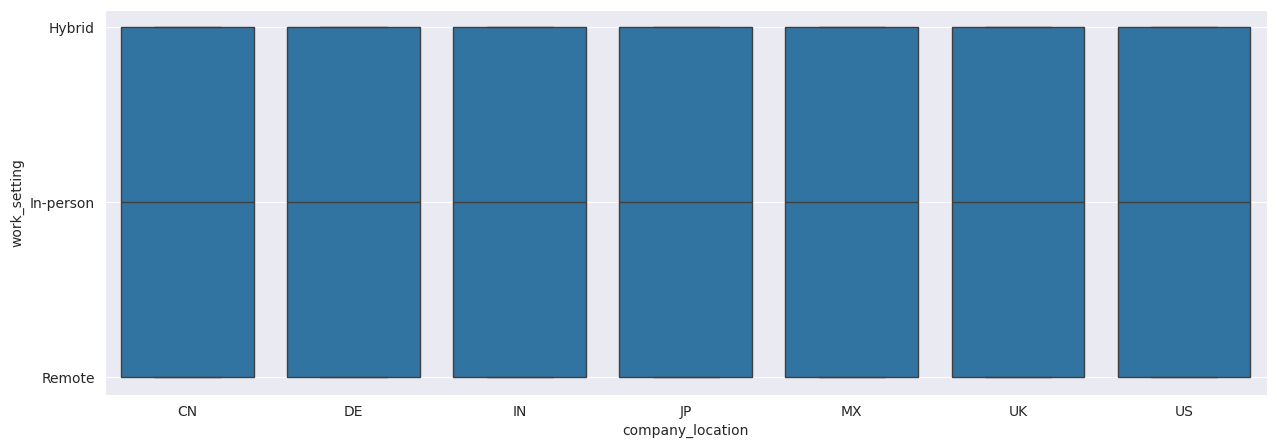

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'jobs' is  original DataFrame
boxplot_dataframe = jobs[['company_location', 'work_setting',]]  # Create a new DataFrame with relevant columns

# Calculate medians if needed for ordering
# For example:
# medians = boxplot_dataframe.groupby('company_location')['work_setting'].median().sort_values()

plt.figure(figsize=(15, 5))

sns.boxplot(
    data=boxplot_dataframe,
    x='company_location',
    y='work_setting',

    # order=medians  # Uncomment if you have calculated medians
)
plt.show()

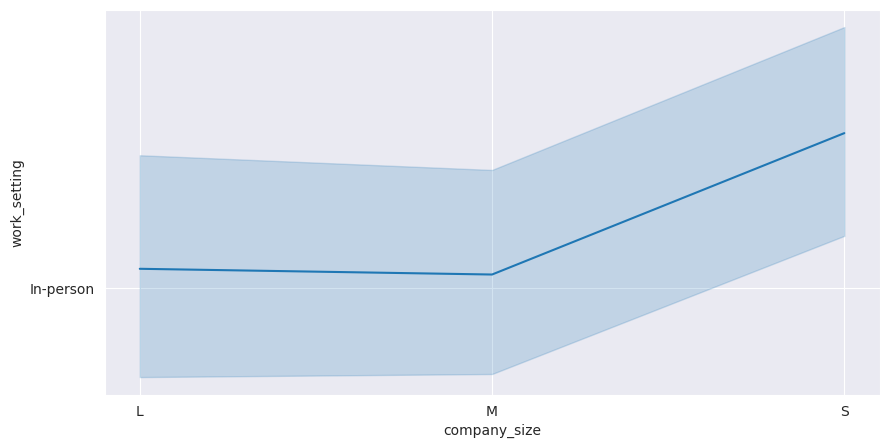

In [203]:

# Assuming 'jobs' is your original DataFrame containing the relevant data
boxplot_dataframe = jobs  # Assign 'jobs' to 'boxplot_dataframe'

plt.figure(figsize=(10, 5))

sns.lineplot(
    data=boxplot_dataframe,
    x='company_size',
    y='work_setting',
)
plt.show()

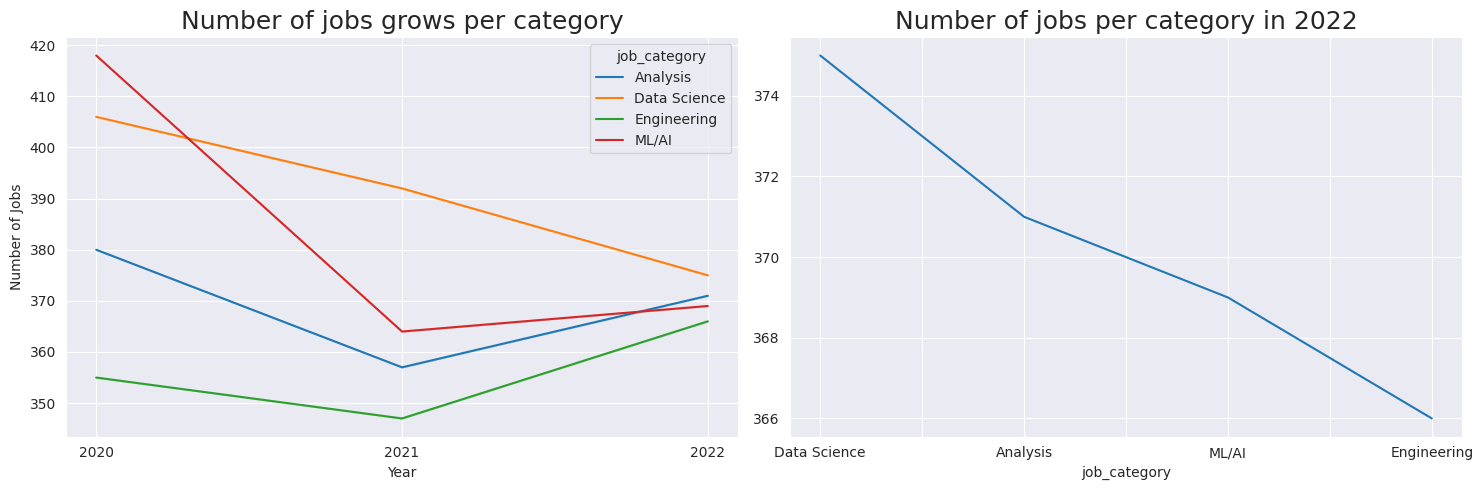

In [204]:
jobs['1'] = 1

plt.figure(figsize = (15,5))


plt.subplot(1, 2, 1)
sns.set_style('darkgrid')
ax = sns.lineplot(
    data = jobs,
    x = 'work_year',
    y = '1',
    hue = 'job_category',
    estimator='sum'

)
ax.set_ylabel('Number of Jobs')
ax.set_xlabel('Year')
ax.set_title('Number of jobs grows per category', fontsize = 18)
plt.xticks(jobs['work_year'].unique())


plt.subplot(1, 2, 2)
ax2 = jobs[jobs['work_year']==2022]['job_category'].value_counts().plot(
    title= 'Number of jobs per category in 2022'
    )

ax2.set_title('Number of jobs per category in 2022', fontsize = 18)

plt.tight_layout()
plt.show()

<Axes: >

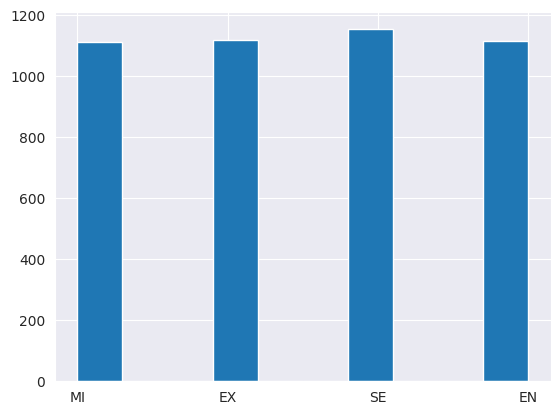

In [205]:
jobs["experience_level"].hist()

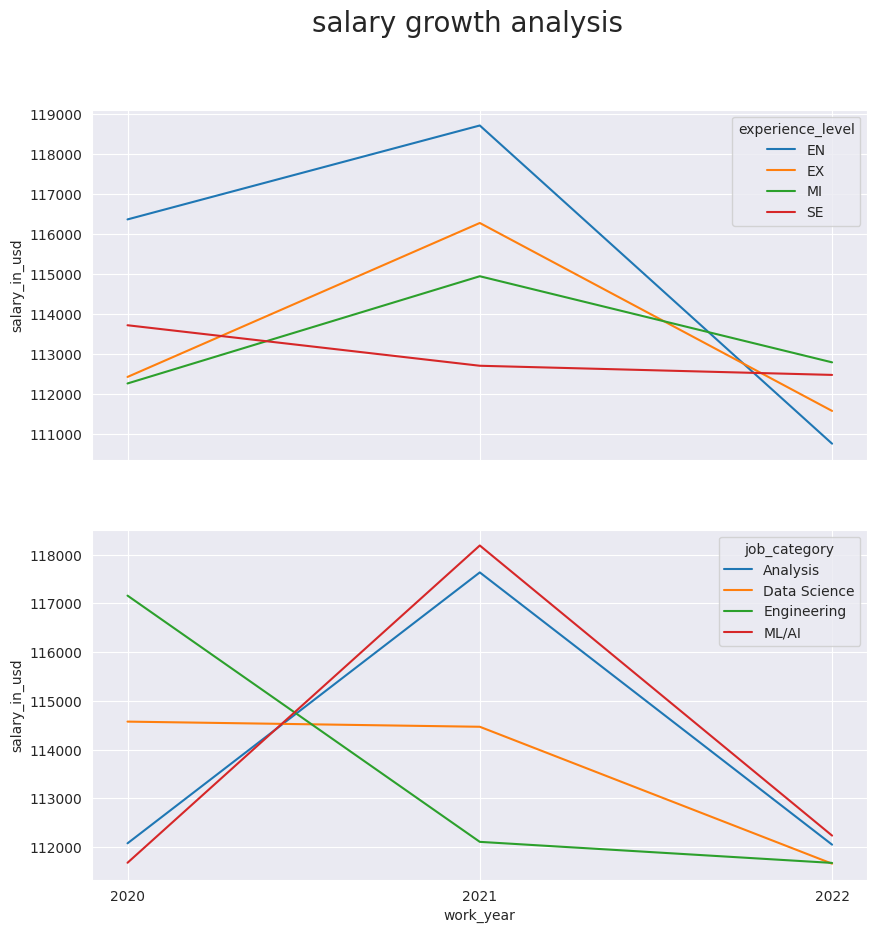

In [206]:
fig, axes = plt.subplots(2,1, figsize = (10,10), sharex=True)

fig.suptitle ('salary growth analysis', fontsize = 20)

sns.set_style('darkgrid')
sns.lineplot(
    ax = axes[0],
    data = jobs,
    x = 'work_year',
    y = 'salary_in_usd',
    hue = 'experience_level',
    estimator='mean',
    errorbar= None
)

sns.lineplot(
    ax = axes[1],
    data = jobs,
    x = 'work_year',
    y = 'salary_in_usd',
    hue = 'job_category',
    estimator='mean',
    errorbar= None

)
plt.xticks(jobs['work_year'].unique())

plt.show()

<ipython-input-207-82fb52124dc9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = boxplot_dataframe.groupby('company_location')['salary_in_usd']


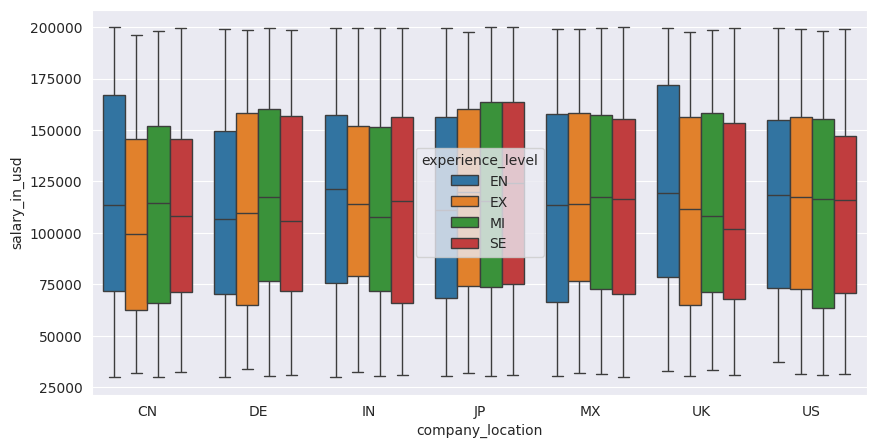

In [207]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
# Calculate medians for company location and sort in descending order
medians = boxplot_dataframe.groupby('company_location')['salary_in_usd']

sns.boxplot(
    data = boxplot_dataframe,
    x = 'company_location',
    y = 'salary_in_usd',
    hue = 'experience_level',
)
plt.show()

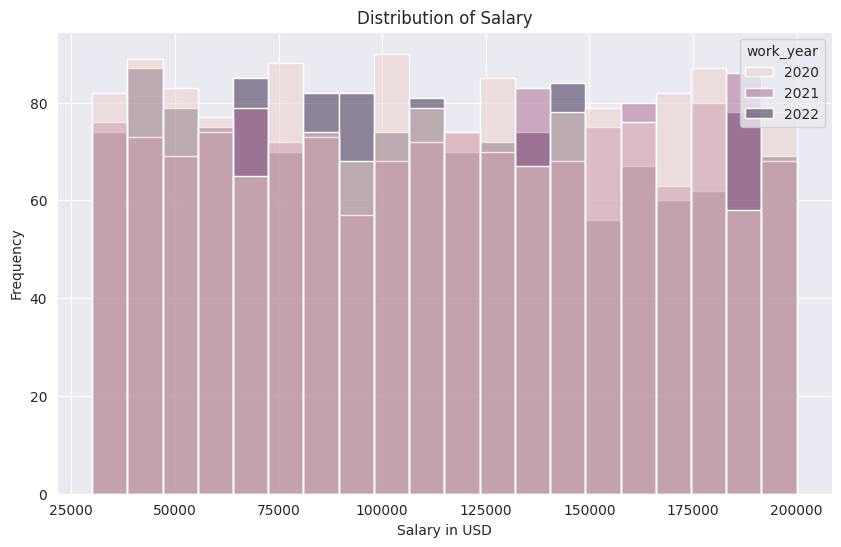

In [208]:
# Distribution of Salary
plt.figure(figsize=(10, 6))
# Use 'x' to specify the column for the x-axis ('work_year' in this case)
# and 'y' to specify the column for the y-axis (or distribution)
sns.histplot(data=jobs, x='salary_in_usd', hue='work_year', bins=20)
plt.title('Distribution of Salary')
plt.xlabel('Salary in USD') # Label adjusted to match data
plt.ylabel('Frequency') # Label adjusted to represent histogram
plt.show()

##Modeling

In [215]:
# Evaluate model using mean absolute error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd  # Make sure pandas is imported


# Assuming 'jobs' is your dataframe with features and target
# Include all necessary columns in X initially
# Include all necessary categorical columns: 'company_location', 'company_size', 'experience_level', 'job_title', 'employee_residence'
X = jobs[['company_location', 'experience_level', 'job_title']]
y = jobs['salary_in_usd']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the categorical columns and transform them
categorical_cols = ['company_location','experience_level', 'job_title'] # List your categorical columns
# Now X contains all necessary columns for encoding
encoded_data = encoder.fit_transform(X[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=X.index) # Use original index

# Concatenate the encoded features with the numerical features, using the original index
# Select only numerical columns that are not in categorical_cols to avoid duplication
numerical_cols = X.select_dtypes(include=['number']).columns.difference(categorical_cols)
X = pd.concat([X[numerical_cols], encoded_df], axis=1)

# Ensure X and y have the same index before splitting
X = X.loc[y.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_preds_0 = model.predict(X_test)
mae_rf = mean_absolute_error(y_test,y_preds_0)
print(mae_rf)

43521.457763028484


##Salary prediction

## Check the Regression Model

In [216]:
# Fitting the Regression Model to the dataset with 10 tree prediction
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [218]:
X = jobs[['company_location', 'experience_level', 'job_title']].values  # Select columns and get values
y = jobs['salary_in_usd'].values  # Select the target column and get values

X  # Display the features stored in X

array([['DE', 'MI', 'Machine Learning Engineer  in office'],
       ['IN', 'EX', 'Statistician  (Remote)'],
       ['CN', 'MI', 'Machine Learning Engineer'],
       ...,
       ['JP', 'EN', 'Machine Learning Engineer'],
       ['DE', 'MI', 'Statistician'],
       ['CN', 'EX', 'Data Scientist  (Remote)']], dtype=object)

In [219]:
y

array([136086,  67982, 153309, ...,  51366, 181817, 172425])

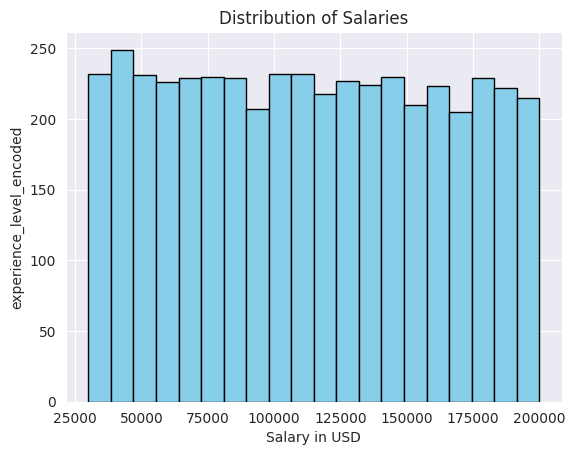

In [221]:
import matplotlib.pyplot as plt

# Create a histogram of the 'salary_in_usd' column
plt.hist(jobs['salary_in_usd'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Salaries')
plt.xlabel('Salary in USD')
plt.ylabel('experience_level_encoded')
plt.show()

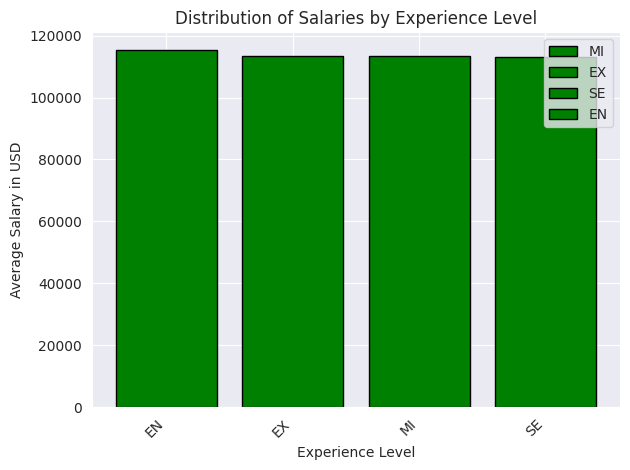

In [222]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique experience levels and their encoded values
experience_levels = jobs['experience_level'].unique()
encoded_levels = jobs['experience_level_encoded'].unique()

# Create a bar plot for each experience level
for level, encoded_level in zip(experience_levels, encoded_levels):
    salaries_for_level = jobs[jobs['experience_level_encoded'] == encoded_level]['salary_in_usd']
    plt.bar(encoded_level, salaries_for_level.mean(), color='green', edgecolor='black', label=level) # Bar for mean salary

plt.title('Distribution of Salaries by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.xticks(encoded_levels, experience_levels, rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [223]:
# Predicting a new result
new_experience_level = 'MI'
encoded_value = jobs[jobs['experience_level'] == new_experience_level]['experience_level_encoded'].iloc[0]

# Create a DataFrame for the new data point with the correct column name
new_data_point = pd.DataFrame([[encoded_value]], columns=['experience_level_encoded'])

# Make the prediction
y_pred = regressor.predict(new_data_point)

print(y_pred)

[113446.20478416]


In [224]:
## check & predicting numerical values (in this case, salary).
from sklearn.ensemble import RandomForestRegressor
# removed unecessary alias for RandomForestRegressor for better code clarity and readibility
lr = RandomForestRegressor()       #lr parameters
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-0.0010200239088589136

##Check the  Decision Tree Regressor model  prediction

In [225]:
# Fitting the Decision Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [226]:
new_experience_level = 'MI'
encoded_value = jobs[jobs['experience_level'] == new_experience_level]['experience_level_encoded'].iloc[0]
new_data_point = pd.DataFrame([[encoded_value]], columns=['experience_level_encoded'])
y_pred = regressor.predict(new_data_point)

In [227]:
y_pred

array([113389.44604317])

In [241]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression  # Assuming you're using a regression model

# Assuming 'jobs' is your original DataFrame
X = jobs.loc[:, ['company_location', 'experience_level', 'job_title']]  # Features
y = jobs.loc[:, 'salary_in_usd']  # Target variable

# Split your data into train/test (if needed)
# For example, let's assume you're using train_test_split to create X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # handle_unknown='ignore' to prevent errors on unseen categories

# Fit and transform the encoder on your training data
X_train_encoded = encoder.fit_transform(X_train[['company_location', 'experience_level', 'job_title']])
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['company_location', 'experience_level', 'job_title']))

# Now, train a model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train_encoded, y_train)


# Transform the new data using the already fitted encoder (DO NOT refit the encoder)
new_data_encoded = encoder.transform(new_data[['company_location', 'experience_level', 'job_title']])
new_data_encoded = pd.DataFrame(new_data_encoded, columns=encoder.get_feature_names_out(['company_location', 'experience_level', 'job_title']))

# Ensure the number of columns in the new data matches the training data
# If any columns are missing, add them with all zeros (for unseen categories during prediction)
missing_cols = set(X_train_encoded.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0

# Ensure the columns are in the same order as during training
new_data_encoded = new_data_encoded[X_train_encoded.columns]

# Now, use the model to predict the salary
predictions = model.predict(new_data_encoded)
print(f"Predicted Salary: ${predictions[0]:,.2f}")


Predicted Salary: $-432,215,680,735,541,824.00


##model pkl

In [229]:
x = jobs.loc[:, ['company_location', 'experience_level', 'job_title']] # Using loc to access data based on column label

# Access data based on column label for y
y = jobs.loc[:, "salary_in_usd"]

x

,company_location,experience_level,job_title
0,DE,MI,Machine Learning Engineer in office
1,IN,EX,Statistician (Remote)
2,CN,MI,Machine Learning Engineer
3,MX,SE,Data Analyst in office
4,UK,MI,Statistician
...,...,...,...
4993,UK,MI,Data Scientist (Remote)
4994,CN,SE,Statistician
4997,JP,EN,Machine Learning Engineer
4998,DE,MI,Statistician


In [230]:
y

,salary_in_usd
0,136086
1,67982
2,153309
3,135242
4,35156
...,...
4993,100031
4994,40047
4997,51366
4998,181817


In [231]:
y_pred = pipe.predict(X_test)#Predicting model

In [233]:
pipe.score(X_test,y_test)*100#used to evaluate the performance of the model and then scales

0.009094786165797508

In [234]:
import pickle #import pickle
pickle.dump(pipe,open("Salary predictor.pkl",'wb')) #dumping model